In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset_build = pd.read_csv("../feature_engineering/datasets/built_dataset.csv")

In [3]:
dataset_build.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442974 entries, 0 to 442973
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   item_name                  442974 non-null  object 
 1   category_name              442974 non-null  object 
 2   date                       442974 non-null  object 
 3   time                       442974 non-null  object 
 4   item_code                  442974 non-null  int64  
 5   quantity_sold_kg           442974 non-null  float64
 6   unit_selling_price_rmb/kg  442974 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 23.7+ MB


In [4]:
dataset_build.head(3)

,item_name,category_name,date,time,item_code,quantity_sold_kg,unit_selling_price_rmb/kg
0,green hot peppers,capsicum,2021-01-01,09:14:26.212,102900005116226,1.132,25.8
1,green hot peppers,capsicum,2021-01-01,09:14:26.324,102900005116226,0.593,25.8
2,yunnan lettuces,flower,2021-01-01,09:16:20.074,102900005115984,0.468,6.0


In [5]:
Wholesale_Price_data = pd.read_csv("../feature_engineering/datasets/wholesale_price.csv")
Wholesale_Price_data.head()

,Date,Item Code,Wholesale Price (RMB/kg)
0,2020-07-01,102900005115762,3.88
1,2020-07-01,102900005115779,6.72
2,2020-07-01,102900005115786,3.19
3,2020-07-01,102900005115793,9.24
4,2020-07-01,102900005115823,7.03


In [6]:
Wholesale_Price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55982 entries, 0 to 55981
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      55982 non-null  object 
 1   Item Code                 55982 non-null  int64  
 2   Wholesale Price (RMB/kg)  55982 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ MB


In [7]:
Wholesale_Price_data.rename(str.lower, axis='columns', inplace=True)

Wholesale_Price_data.rename(lambda x: x.replace(" ", "_"), axis='columns', inplace=True)
Wholesale_Price_data.columns

# Check for duplicates in the 'Item Code' column
duplicates_counts = Wholesale_Price_data['item_code'].duplicated().sum()

# Print the count of duplicates
print("Number of duplicate entries in 'Item Code':", duplicates_counts)

# Optionally, you can print the actual duplicated rows
duplicates = Wholesale_Price_data[Wholesale_Price_data['item_code'].duplicated(keep=False)]
print("Duplicate entries:")
print(duplicates)


Number of duplicate entries in 'Item Code': 55731
Duplicate entries:
             date        item_code  wholesale_price_(rmb/kg)
0      2020-07-01  102900005115762                      3.88
1      2020-07-01  102900005115779                      6.72
2      2020-07-01  102900005115786                      3.19
3      2020-07-01  102900005115793                      9.24
4      2020-07-01  102900005115823                      7.03
...           ...              ...                       ...
55977  2023-06-30  102900051000944                     18.00
55978  2023-06-30  102900051004294                      6.45
55979  2023-06-30  102900051010455                      4.48
55980  2023-06-30  106949711300259                      1.45
55981  2023-06-30  106971533450003                      1.95

[55974 rows x 3 columns]


In [8]:
loss_rate = pd.read_csv('../feature_engineering/datasets/loss_rate.csv')
(loss_rate.head())

,Item Code,Item Name,Loss Rate (%)
0,102900005115168,Niushou Shengcai,4.39
1,102900005115199,Sichuan Red Cedar,10.46
2,102900005115250,Xixia Black Mushroom (1),10.80
3,102900005115625,Local Xiaomao Cabbage,0.18
4,102900005115748,White Caitai,8.78


In [9]:
loss_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Item Code      251 non-null    int64  
 1   Item Name      251 non-null    object 
 2   Loss Rate (%)  251 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.0+ KB


In [10]:
loss_rate.rename(str.lower, axis='columns', inplace=True)

loss_rate.rename(lambda x: x.replace(" ", "_"), axis='columns', inplace=True)
loss_rate.columns

# Check for duplicates in the 'Item Code' column
duplicates_count = loss_rate['item_code'].duplicated().sum()

# Print the count of duplicates
print("Number of duplicate entries in 'Item Code':", duplicates_count)

# Optionally, you can print the actual duplicated rows
duplicates = loss_rate[loss_rate['item_code'].duplicated(keep=False)]
print("Duplicate entries:")
print(duplicates)

Number of duplicate entries in 'Item Code': 0
Duplicate entries:
Empty DataFrame
Columns: [item_code, item_name, loss_rate_(%)]
Index: []


In [11]:
Wholesale_Price_data_drop = Wholesale_Price_data.drop_duplicates()
Wholesale_Price_data_drop

,date,item_code,wholesale_price_(rmb/kg)
0,2020-07-01,102900005115762,3.88
1,2020-07-01,102900005115779,6.72
2,2020-07-01,102900005115786,3.19
3,2020-07-01,102900005115793,9.24
4,2020-07-01,102900005115823,7.03
...,...,...,...
55977,2023-06-30,102900051000944,18.00
55978,2023-06-30,102900051004294,6.45
55979,2023-06-30,102900051010455,4.48
55980,2023-06-30,106949711300259,1.45


In [12]:
loss_rate_drop = loss_rate.drop_duplicates()
loss_rate_drop

,item_code,item_name,loss_rate_(%)
0,102900005115168,Niushou Shengcai,4.39
1,102900005115199,Sichuan Red Cedar,10.46
2,102900005115250,Xixia Black Mushroom (1),10.80
3,102900005115625,Local Xiaomao Cabbage,0.18
4,102900005115748,White Caitai,8.78
...,...,...,...
246,106971533455008,Haixian Mushroom (Bag) (3),1.30
247,106971563780002,Xianzongye (Bag) (2),0.00
248,106972776821582,Xianzongye (Bag) (3),9.43
249,106973223300667,Chinese Caterpillar Fungus Flowers (Box) (2),11.13


<BarContainer object of 6 artists>

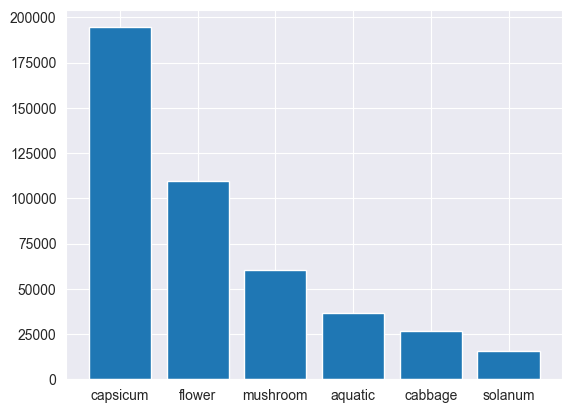

In [13]:
plt.bar(dataset_build['category_name'].unique(), dataset_build['category_name'].value_counts())

In [14]:
#Wholesale_Price_data_drop.columns = Wholesale_Price_data_drop.columns.str.replace(" ", "_")
Wholesale_Price_data_drop.head()

,date,item_code,wholesale_price_(rmb/kg)
0,2020-07-01,102900005115762,3.88
1,2020-07-01,102900005115779,6.72
2,2020-07-01,102900005115786,3.19
3,2020-07-01,102900005115793,9.24
4,2020-07-01,102900005115823,7.03


In [15]:
#loss_rate_drop.columns = loss_rate_drop.columns.str.replace(" ", "_")
loss_rate_drop.head()

,item_code,item_name,loss_rate_(%)
0,102900005115168,Niushou Shengcai,4.39
1,102900005115199,Sichuan Red Cedar,10.46
2,102900005115250,Xixia Black Mushroom (1),10.80
3,102900005115625,Local Xiaomao Cabbage,0.18
4,102900005115748,White Caitai,8.78


In [16]:
dataset_build.dtypes

item_name                     object
category_name                 object
date                          object
time                          object
item_code                      int64
quantity_sold_kg             float64
unit_selling_price_rmb/kg    float64
dtype: object

In [17]:
#Wholesale_Price_data_drop.columns = [col.replace('_', ' ') for col in Wholesale_Price_data_drop.columns]

In [18]:

# Convert 'Date' column to object type
Wholesale_Price_data_drop['date'] = Wholesale_Price_data_drop['date'].astype(str)

In [19]:
Wholesale_Price_data_drop.dtypes

date                         object
item_code                     int64
wholesale_price_(rmb/kg)    float64
dtype: object

In [20]:
#loss_rate_drop.columns = [col.replace('_', ' ') for col in loss_rate_drop.columns]

In [21]:
loss_rate_drop.dtypes

item_code          int64
item_name         object
loss_rate_(%)    float64
dtype: object

In [22]:
print(Wholesale_Price_data_drop['date'].min(), Wholesale_Price_data_drop['date'].max())

2020-07-01 2023-06-30


In [23]:
cf = Wholesale_Price_data_drop[(Wholesale_Price_data_drop['date'] >= '2021-01-01') & (Wholesale_Price_data_drop['date'] <= '2022-12-31')]
cf.shape

(39491, 3)

In [24]:
sales_wholesale_df = pd.merge(dataset_build, cf, on=['item_code', 'date'], how='inner')
sales_wholesale_df.head()

,item_name,category_name,date,time,item_code,quantity_sold_kg,unit_selling_price_rmb/kg,wholesale_price_(rmb/kg)
0,green hot peppers,capsicum,2021-01-01,09:14:26.212,102900005116226,1.132,25.8,15.21
1,green hot peppers,capsicum,2021-01-01,09:14:26.324,102900005116226,0.593,25.8,15.21
2,yunnan lettuces,flower,2021-01-01,09:16:20.074,102900005115984,0.468,6.0,3.19
3,xixia mushroom,mushroom,2021-01-01,09:18:49.451,102900005116530,0.389,18.0,13.00
4,paopaojiao,capsicum,2021-01-01,09:19:14.842,102900005117056,0.606,18.0,14.31


In [25]:
sales_wholesale_df.isnull().sum()

item_name                    0
category_name                0
date                         0
time                         0
item_code                    0
quantity_sold_kg             0
unit_selling_price_rmb/kg    0
wholesale_price_(rmb/kg)     0
dtype: int64

In [26]:
for i in range(sales_wholesale_df.shape[0]):
    for j in range(loss_rate_drop.shape[0]):
        if sales_wholesale_df['item_code'].iloc[i] == loss_rate_drop['item_code'].iloc[j]:
            sales_wholesale_df.at[i, 'item_name'] = loss_rate_drop['item_name'].iloc[j]
            sales_wholesale_df.at[i, 'loss_rate_(%)'] = loss_rate_drop['loss_rate_(%)'].iloc[j]
            break  # Break the inner loop once a match is found

# Display the merged DataFrame 'a'
sales_wholesale_cat_df = sales_wholesale_df
sales_wholesale_cat_df.head()

,item_name,category_name,date,time,item_code,quantity_sold_kg,unit_selling_price_rmb/kg,wholesale_price_(rmb/kg),loss_rate_(%)
0,Green Hot Peppers,capsicum,2021-01-01,09:14:26.212,102900005116226,1.132,25.8,15.21,6.72
1,Green Hot Peppers,capsicum,2021-01-01,09:14:26.324,102900005116226,0.593,25.8,15.21,6.72
2,Yunnan Lettuces,flower,2021-01-01,09:16:20.074,102900005115984,0.468,6.0,3.19,12.81
3,Xixia Mushroom (1),mushroom,2021-01-01,09:18:49.451,102900005116530,0.389,18.0,13.00,13.82
4,Paopaojiao (Jingpin),capsicum,2021-01-01,09:19:14.842,102900005117056,0.606,18.0,14.31,7.08


In [27]:
sales_wholesale_cat_df.isnull().sum()

item_name                    0
category_name                0
date                         0
time                         0
item_code                    0
quantity_sold_kg             0
unit_selling_price_rmb/kg    0
wholesale_price_(rmb/kg)     0
loss_rate_(%)                0
dtype: int64

In [28]:
data = sales_wholesale_cat_df
data.head()

,item_name,category_name,date,time,item_code,quantity_sold_kg,unit_selling_price_rmb/kg,wholesale_price_(rmb/kg),loss_rate_(%)
0,Green Hot Peppers,capsicum,2021-01-01,09:14:26.212,102900005116226,1.132,25.8,15.21,6.72
1,Green Hot Peppers,capsicum,2021-01-01,09:14:26.324,102900005116226,0.593,25.8,15.21,6.72
2,Yunnan Lettuces,flower,2021-01-01,09:16:20.074,102900005115984,0.468,6.0,3.19,12.81
3,Xixia Mushroom (1),mushroom,2021-01-01,09:18:49.451,102900005116530,0.389,18.0,13.00,13.82
4,Paopaojiao (Jingpin),capsicum,2021-01-01,09:19:14.842,102900005117056,0.606,18.0,14.31,7.08


In [29]:
data.isnull().sum()

item_name                    0
category_name                0
date                         0
time                         0
item_code                    0
quantity_sold_kg             0
unit_selling_price_rmb/kg    0
wholesale_price_(rmb/kg)     0
loss_rate_(%)                0
dtype: int64

In [30]:
data = data.drop_duplicates()
data

,item_name,category_name,date,time,item_code,quantity_sold_kg,unit_selling_price_rmb/kg,wholesale_price_(rmb/kg),loss_rate_(%)
0,Green Hot Peppers,capsicum,2021-01-01,09:14:26.212,102900005116226,1.132,25.8,15.21,6.72
1,Green Hot Peppers,capsicum,2021-01-01,09:14:26.324,102900005116226,0.593,25.8,15.21,6.72
2,Yunnan Lettuces,flower,2021-01-01,09:16:20.074,102900005115984,0.468,6.0,3.19,12.81
3,Xixia Mushroom (1),mushroom,2021-01-01,09:18:49.451,102900005116530,0.389,18.0,13.00,13.82
4,Paopaojiao (Jingpin),capsicum,2021-01-01,09:19:14.842,102900005117056,0.606,18.0,14.31,7.08
...,...,...,...,...,...,...,...,...,...
442969,Wawacai,flower,2022-12-31,21:15:42.594,102900005118831,1.000,3.5,2.99,2.48
442970,Wawacai,flower,2022-12-31,21:30:36.49,102900005118831,1.000,2.1,2.99,2.48
442971,Yunnan Lettuce (Bag),flower,2022-12-31,21:32:20.42,102900011030059,1.000,2.7,2.58,9.43
442972,Wawacai,flower,2022-12-31,21:38:08.696,102900005118831,1.000,3.5,2.99,2.48


In [32]:
#All Sales
data['quantity_sold_kg'] = data['quantity_sold_kg'].round(1)
data = data.assign(total_sales = data['quantity_sold_kg'] * data['unit_selling_price_rmb/kg'])
data.head()

,item_name,category_name,date,time,item_code,quantity_sold_kg,unit_selling_price_rmb/kg,wholesale_price_(rmb/kg),loss_rate_(%),total_sales
0,Green Hot Peppers,capsicum,2021-01-01,09:14:26.212,102900005116226,1.1,25.8,15.21,6.72,28.38
1,Green Hot Peppers,capsicum,2021-01-01,09:14:26.324,102900005116226,0.6,25.8,15.21,6.72,15.48
2,Yunnan Lettuces,flower,2021-01-01,09:16:20.074,102900005115984,0.5,6.0,3.19,12.81,3.00
3,Xixia Mushroom (1),mushroom,2021-01-01,09:18:49.451,102900005116530,0.4,18.0,13.00,13.82,7.20
4,Paopaojiao (Jingpin),capsicum,2021-01-01,09:19:14.842,102900005117056,0.6,18.0,14.31,7.08,10.80


In [33]:
## total sales per day
total_sales_per_day = data.groupby(['date'])['total_sales'].sum().reset_index()
total_sales_per_day

,date,total_sales
0,2021-01-01,4013.16
1,2021-01-02,3692.16
2,2021-01-03,3471.64
3,2021-01-04,2844.66
4,2021-01-05,2824.72
...,...,...
716,2022-12-27,1650.60
717,2022-12-28,1688.68
718,2022-12-29,1720.19
719,2022-12-30,1577.36


In [34]:
data['item_name'].nunique()

152

In [35]:
avg_selling_price_each_item = data.groupby(['item_name'])['unit_selling_price_rmb/kg'].mean().reset_index().rename(columns = {"unit_selling_price_rmb/kg" : "Avg Selling Price"})
avg_selling_price_each_item

,item_name,Avg Selling Price
0,7 Colour Pepper (1),21.805952
1,Agaricus Bisporus (Bag),7.980000
2,Aihao,6.000000
3,Amaranth,4.814075
4,Apricot Bao Mushroom (1),9.478495
...,...,...
147,Yuxingcao (Bag),4.693388
148,Zhijiang Qinggengsanhua,7.671782
149,Zhijiang Red Bolt,5.284824
150,Zhimaxiancai,6.000000


In [36]:
## average selling price for each item and each category

avg_selling_price_each_category = data.groupby(['category_name'])['unit_selling_price_rmb/kg'].mean().reset_index().rename(columns = {"unit_selling_price_rmb/kg" : "Avg Selling Price"})
avg_selling_price_each_category

,category_name,Avg Selling Price
0,aquatic,9.417657
1,cabbage,7.439760
2,capsicum,11.156743
3,flower,6.534790
4,mushroom,15.653296
5,solanum,8.873326


In [37]:
top_selling_item = avg_selling_price_each_item.nlargest(1, 'Avg Selling Price')
top_selling_item

,item_name,Avg Selling Price
9,Black Porcini,91.6


In [38]:
# Drop unnecessary columns (if any)
columns_to_drop = ['item_code']
data = data.drop(columns=columns_to_drop)
data.head()

,item_name,category_name,date,time,quantity_sold_kg,unit_selling_price_rmb/kg,wholesale_price_(rmb/kg),loss_rate_(%),total_sales
0,Green Hot Peppers,capsicum,2021-01-01,09:14:26.212,1.1,25.8,15.21,6.72,28.38
1,Green Hot Peppers,capsicum,2021-01-01,09:14:26.324,0.6,25.8,15.21,6.72,15.48
2,Yunnan Lettuces,flower,2021-01-01,09:16:20.074,0.5,6.0,3.19,12.81,3.00
3,Xixia Mushroom (1),mushroom,2021-01-01,09:18:49.451,0.4,18.0,13.00,13.82,7.20
4,Paopaojiao (Jingpin),capsicum,2021-01-01,09:19:14.842,0.6,18.0,14.31,7.08,10.80


In [39]:
data.isnull().sum()

item_name                    0
category_name                0
date                         0
time                         0
quantity_sold_kg             0
unit_selling_price_rmb/kg    0
wholesale_price_(rmb/kg)     0
loss_rate_(%)                0
total_sales                  0
dtype: int64

In [40]:
print(data.columns)

Index(['item_name', 'category_name', 'date', 'time', 'quantity_sold_kg',
       'unit_selling_price_rmb/kg', 'wholesale_price_(rmb/kg)',
       'loss_rate_(%)', 'total_sales'],
      dtype='object')


In [41]:
import pandas as pd

# Assuming 'filtered_data' is your preprocessed dataset
data['date'] = pd.to_datetime(data['date'])
data['Month'] = data['date'].dt.month
data['Year'] = data['date'].dt.year

# Aggregate data based on month and year
monthly_data = data.groupby(['Year', 'Month']).agg({
    'quantity_sold_kg': 'sum',
    'loss_rate_(%)': 'mean',
    'total_sales': 'sum'
}).reset_index()

desired_column_order = [
    'date', 
    'Year', 
    'Month',
    'time', 
    'category_name', 
    'item_name', 
    'quantity_sold_kg', 
    'unit_selling_price_rmb/kg', 
    'wholesale_price_(rmb/kg)', 
    'loss_rate_(%)', 
    'total_sales', 
    'sale_or_return', 
    'discount'
    # Add any other columns you want at the end
]
# Reorder the columns of merged_data based on the desired_column_order
data = data.reindex(columns=desired_column_order)

# Display the DataFrame with the reordered columns
data.head()

,date,Year,Month,time,category_name,item_name,quantity_sold_kg,unit_selling_price_rmb/kg,wholesale_price_(rmb/kg),loss_rate_(%),total_sales,sale_or_return,discount
0,2021-01-01,2021,1,09:14:26.212,capsicum,Green Hot Peppers,1.1,25.8,15.21,6.72,28.38,NaN,NaN
1,2021-01-01,2021,1,09:14:26.324,capsicum,Green Hot Peppers,0.6,25.8,15.21,6.72,15.48,NaN,NaN
2,2021-01-01,2021,1,09:16:20.074,flower,Yunnan Lettuces,0.5,6.0,3.19,12.81,3.00,NaN,NaN
3,2021-01-01,2021,1,09:18:49.451,mushroom,Xixia Mushroom (1),0.4,18.0,13.00,13.82,7.20,NaN,NaN
4,2021-01-01,2021,1,09:19:14.842,capsicum,Paopaojiao (Jingpin),0.6,18.0,14.31,7.08,10.80,NaN,NaN


In [42]:
# Drop unnecessary columns (if any)
columns_to_drops = ['Year', 'date', 'time']
data = data.drop(columns=columns_to_drops)
data.head()

,Month,category_name,item_name,quantity_sold_kg,unit_selling_price_rmb/kg,wholesale_price_(rmb/kg),loss_rate_(%),total_sales,sale_or_return,discount
0,1,capsicum,Green Hot Peppers,1.1,25.8,15.21,6.72,28.38,NaN,NaN
1,1,capsicum,Green Hot Peppers,0.6,25.8,15.21,6.72,15.48,NaN,NaN
2,1,flower,Yunnan Lettuces,0.5,6.0,3.19,12.81,3.00,NaN,NaN
3,1,mushroom,Xixia Mushroom (1),0.4,18.0,13.00,13.82,7.20,NaN,NaN
4,1,capsicum,Paopaojiao (Jingpin),0.6,18.0,14.31,7.08,10.80,NaN,NaN


In [43]:
data.isnull().sum()

Month                             0
category_name                     0
item_name                         0
quantity_sold_kg                  0
unit_selling_price_rmb/kg         0
wholesale_price_(rmb/kg)          0
loss_rate_(%)                     0
total_sales                       0
sale_or_return               442974
discount                     442974
dtype: int64

Check Outliers and Outlier Handling

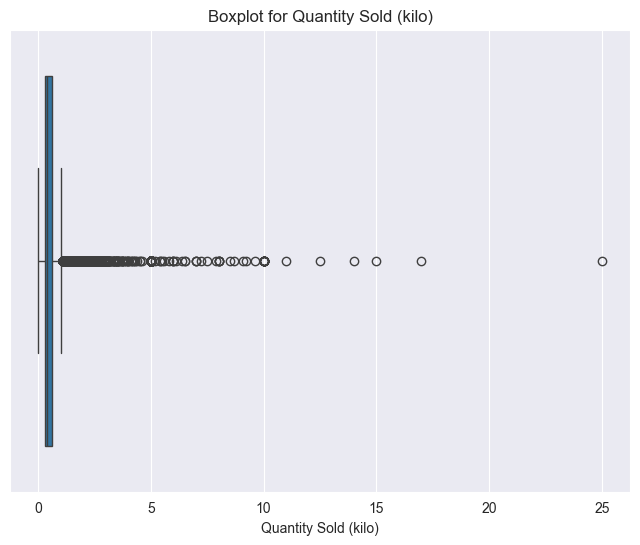

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a boxplot specifically for the 'Quantity Sold (kilo)' column
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=data['quantity_sold_kg'])  # Create the boxplot using seaborn
plt.title('Boxplot for Quantity Sold (kilo)')  # Set the title of the plot
plt.xlabel('Quantity Sold (kilo)')  # Set the label for the x-axis
plt.show()  # Display the plot


In [45]:
import numpy as np
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'Quantity Sold (kilo)'
Q1 = data['quantity_sold_kg'].quantile(0.25)
Q3 = data['quantity_sold_kg'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify outliers
outliers = (data['quantity_sold_kg'] < lower_bound) | (data['quantity_sold_kg'] > upper_bound)

# Calculate the mean excluding outliers
mean_without_outliers = np.mean(data.loc[~outliers, 'quantity_sold_kg'])

# Replace outliers with the mean excluding outliers
data.loc[outliers, 'quantity_sold_kg'] = mean_without_outliers

# Filter out rows where 'Quantity Sold (kilo)' is outside the bounds
filtered_data = data[(data['quantity_sold_kg'] >= lower_bound) & (data['quantity_sold_kg'] <= upper_bound)]

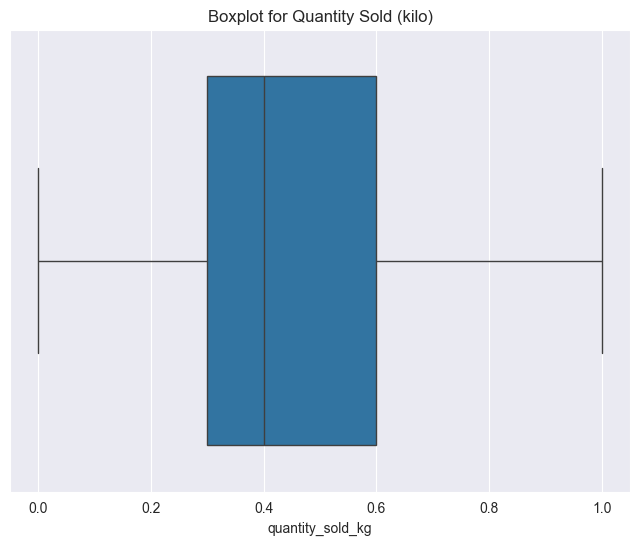

In [46]:
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=filtered_data['quantity_sold_kg'])  # Create the boxplot using seaborn
plt.title('Boxplot for Quantity Sold (kilo)')  # Set the title of the plot
plt.xlabel('quantity_sold_kg')  # Set the label for the x-axis
plt.show()

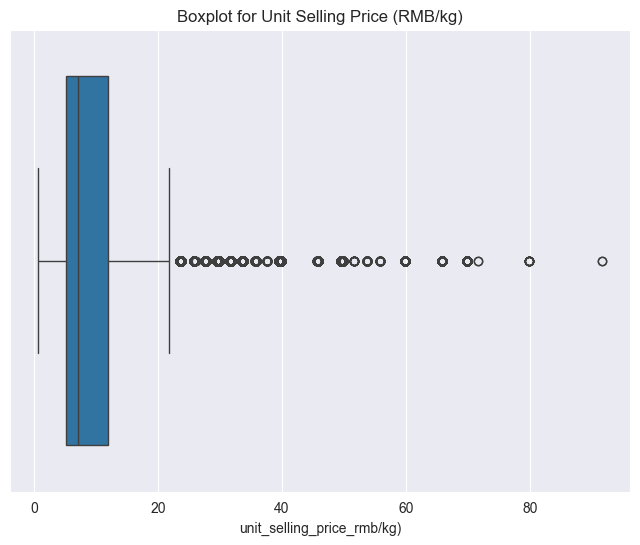

In [47]:
# Generate a boxplot specifically for the 'Unit Selling Price (RMB/kg)' column
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=filtered_data['unit_selling_price_rmb/kg'])  # Create the boxplot using seaborn
plt.title('Boxplot for Unit Selling Price (RMB/kg)')  # Set the title of the plot
plt.xlabel('unit_selling_price_rmb/kg)')  # Set the label for the x-axis
plt.show()  # Display the plot

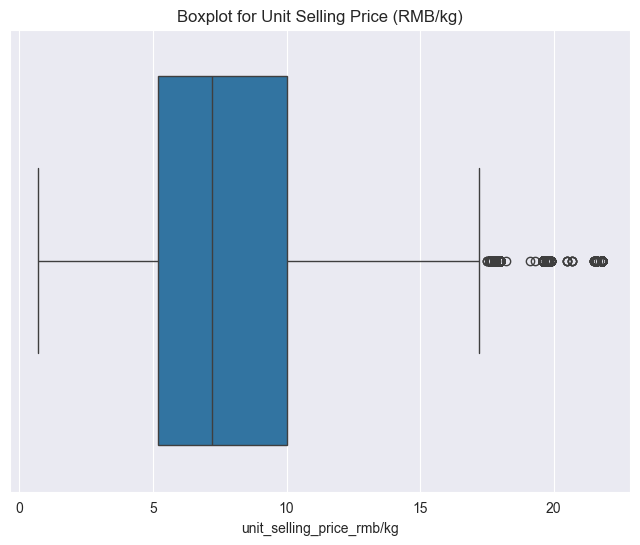

In [48]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'Unit Selling Price (RMB/kg)'
Q1 = filtered_data['unit_selling_price_rmb/kg'].quantile(0.25)
Q3 = filtered_data['unit_selling_price_rmb/kg'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify outliers
outliers = (data['unit_selling_price_rmb/kg'] < lower_bound) | (data['unit_selling_price_rmb/kg'] > upper_bound)

# Replace outliers with the mean value without considering outliers in the mean calculation
mean_without_outliers = np.mean(data.loc[~outliers, 'unit_selling_price_rmb/kg'])
data.loc[outliers, 'unit_selling_price_rmb/kg'] = mean_without_outliers

# Filter out rows where 'Unit Selling Price (RMB/kg)' is outside the bounds
filtered_data = data[(data['unit_selling_price_rmb/kg'] >= lower_bound) & (data['unit_selling_price_rmb/kg'] <= upper_bound)]

plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=filtered_data['unit_selling_price_rmb/kg'])  # Create the boxplot using seaborn
plt.title('Boxplot for Unit Selling Price (RMB/kg)')  # Set the title of the plot
plt.xlabel('unit_selling_price_rmb/kg')  # Set the label for the x-axis
plt.show()


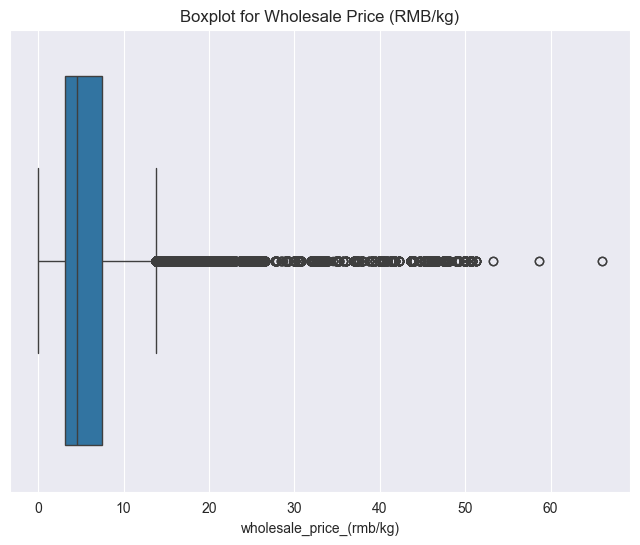

In [49]:
# Generate a boxplot specifically for the 'Wholesale Price (RMB/kg)' column
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=filtered_data['wholesale_price_(rmb/kg)'])  # Create the boxplot using seaborn
plt.title('Boxplot for Wholesale Price (RMB/kg)')  # Set the title of the plot
plt.xlabel('wholesale_price_(rmb/kg)')  # Set the label for the x-axis
plt.show()  # Display the plot

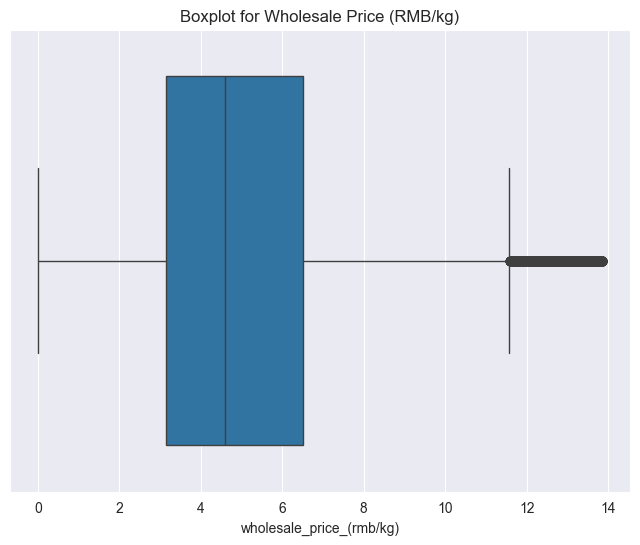

In [50]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'Wholesale Price (RMB/kg)'
Q1 = filtered_data['wholesale_price_(rmb/kg)'].quantile(0.25)
Q3 = filtered_data['wholesale_price_(rmb/kg)'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify outliers
outliers = (data['wholesale_price_(rmb/kg)'] < lower_bound) | (data['wholesale_price_(rmb/kg)'] > upper_bound)

# Replace outliers with the mean value without considering outliers in the mean calculation
mean_without_outliers = np.mean(data.loc[~outliers, 'wholesale_price_(rmb/kg)'])
data.loc[outliers, 'wholesale_price_(rmb/kg)'] = mean_without_outliers

# Filter out rows where 'Wholesale Price (RMB/kg)' is outside the bounds
filtered_data = data[(data['wholesale_price_(rmb/kg)'] >= lower_bound) & (data['wholesale_price_(rmb/kg)'] <= upper_bound)]

plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=filtered_data['wholesale_price_(rmb/kg)'])  # Create the boxplot using seaborn
plt.title('Boxplot for Wholesale Price (RMB/kg)')  # Set the title of the plot
plt.xlabel('wholesale_price_(rmb/kg)')  # Set the label for the x-axis
plt.show()

In [51]:
filtered_data.head()

,Month,category_name,item_name,quantity_sold_kg,unit_selling_price_rmb/kg,wholesale_price_(rmb/kg),loss_rate_(%),total_sales,sale_or_return,discount
0,1,capsicum,Green Hot Peppers,0.450737,8.478437,5.238012,6.72,28.38,NaN,NaN
1,1,capsicum,Green Hot Peppers,0.600000,8.478437,5.238012,6.72,15.48,NaN,NaN
2,1,flower,Yunnan Lettuces,0.500000,6.000000,3.190000,12.81,3.00,NaN,NaN
3,1,mushroom,Xixia Mushroom (1),0.400000,18.000000,13.000000,13.82,7.20,NaN,NaN
4,1,capsicum,Paopaojiao (Jingpin),0.600000,18.000000,5.238012,7.08,10.80,NaN,NaN


In [52]:
filtered_data.shape

(442974, 10)

In [53]:
filtered_data = filtered_data.drop(columns=['quantity_sold_kg'])
filtered_data.head(3)

,Month,category_name,item_name,unit_selling_price_rmb/kg,wholesale_price_(rmb/kg),loss_rate_(%),total_sales,sale_or_return,discount
0,1,capsicum,Green Hot Peppers,8.478437,5.238012,6.72,28.38,NaN,NaN
1,1,capsicum,Green Hot Peppers,8.478437,5.238012,6.72,15.48,NaN,NaN
2,1,flower,Yunnan Lettuces,6.000000,3.190000,12.81,3.00,NaN,NaN


In [54]:
filtered_data['item_name'] = filtered_data['item_name'].str.lower()
filtered_data.rename(columns={'Month': 'month'}, inplace=True)

Save data in a file

In [56]:
# save built dataset
filtered_data.to_csv('datasets/cleaned_loss_rate_dataset.csv', index=False)